# Statistical Data Types

**Developer:** Mark Trombly

**Course:** Exploration into AI, Machine and Deep Learning

**Semester:** Summer 2025

## Qualitative (Categorical) Data:

- Characteristics/qualities cannot be measured numerically
- Examples: gender, hair color, marital status, vehicle type

### Subtypes:

1. **Nominal Data:** Categories with no order or ranking

   **Examples:** *colors (red, blue, green) types of fruit (apple, banana, orange) or zip codes*

   
2. **Ordinal Data:** Categories with order or ranking: differences between ranks may not be equal or quantifiable

   **Examples:** *education level (high school, bachelor's, master's), customer satisfaction (very dissatisfied, dissatisfied, neutral, satisfied, very satisfied), or income level (low, middle, high)*

## Quantitative (numerical Data:

- Quantities or measurements expressed in numbers, also can perform mathematical operations
- Examples: *height, weight, age, test scores, income*

### Subtypes:

1. **Discrete Data:** Numerical data, can be counted

   **Examples:** *number of students in class, the number of cars passing a point on a road, or the number of defective items in a batch*

   
2. **Continuous Data:** Numerical data having any value within range
   
   **Examples:** *height, weight, temperature, or time. May be further divided into interval and ratio data*

In [1]:
"""
Bill Greene's credit scoring data:
https://search.r-project.org/CRAN/refmans/AER/html/CreditCard.html

Resources:
https://builtin.com/data-science/train-test-split
https://www.kaggle.com/code/mozammalhaquetonoy/intermediate-machine-learning

Expenditure and Default Data
Description: Cross-section data on credit history for sample of applicants for type of credit card
Format: contains 1,319 observations on 12 variables

Attributes:
card (Factor): Was application for credit card accepted?
reports: Number of major derogatory reports
age: in years plus twelfths of a year
income: Yearly income (in USD 10,000)
share: Ratio of monthly credit card expenditures to yearly income
expenditure: Average monthly credit card expenditure
owner (Factor): Does individual own their home?
selfemp (Factor): Is individual self-employed?
dependents: Number of dependents
months: Months living at current address
majorcards: Number of major credit cards held
active: Number of active credit accounts
"""

# import necessary packages
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for charts/plots
import seaborn as sns # for charts/plots
from sklearn.model_selection import train_test_split # for training/testing model

# for Random Forest classifier and accuracy score evaluator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Resources:
# https://builtin.com/data-science/train-test-split
# https://builtin.com/data-science/random-forest-algorithm
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [2]:
print(sys.version) # print python version
print(os.environ['CONDA_DEFAULT_ENV']) # print conda environment

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
testenv


In [3]:
# read csv file into DataFrame
df = pd.read_csv('credit_card.csv')

In [4]:
# DataFrame dimensions (rows/cols)
df.shape

(1319, 12)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# display column names
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [7]:
# first 5 records
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [9]:
# binary encoding: change categorical variables "yes" and "no" into numerical format (through, still objects!)
# Note: values replaced in original DataFrame--NOT .csv file!
with pd.option_context('future.no_silent_downcasting', True):
    df['card'] = df['card'].replace(['yes', 'no'], [1,0])
    df['owner'] = df['owner'].replace(['yes', 'no'], [1,0])
    df['selfemp'] = df['selfemp'].replace(['yes', 'no'], [1,0])

df.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [10]:
# isna() detects missing values (returns True or False)
# When combined with sum(), calculates total number of missing values (True=1, and False=0)

# validate data (no "Not Avaliable" values)
df.isna().sum()

# Note: df.isnull().sum() functionally identical to df.isna().sum()
# Stictly matter of preference. Though, isna() aligns with other Pandas functions like dropna() and fillna()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [11]:
df.describe()

# Note: describe() did NOT include objects (i.e., "card" "owner" "selfemp")

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [12]:
# list varible types BEFORE conversion
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [13]:
# convert Series with object dtype e.g., strings repesenting numbers 0,1) to Serices with integer dtype
# Note: errors='coerce' turns unconvertible values into NaN
df['card'] = pd.to_numeric(df['card'], errors='coerce')
df['owner'] = pd.to_numeric(df['owner'], errors='coerce')
df['selfemp'] = pd.to_numeric(df['selfemp'], errors='coerce')

# Note: only use astpe(numeric type) if confident ALL values in column can be converted to numeric type!
# y = y.astype(int)

In [14]:
# list variable types AFTER conversion
df.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner            int64
selfemp          int64
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

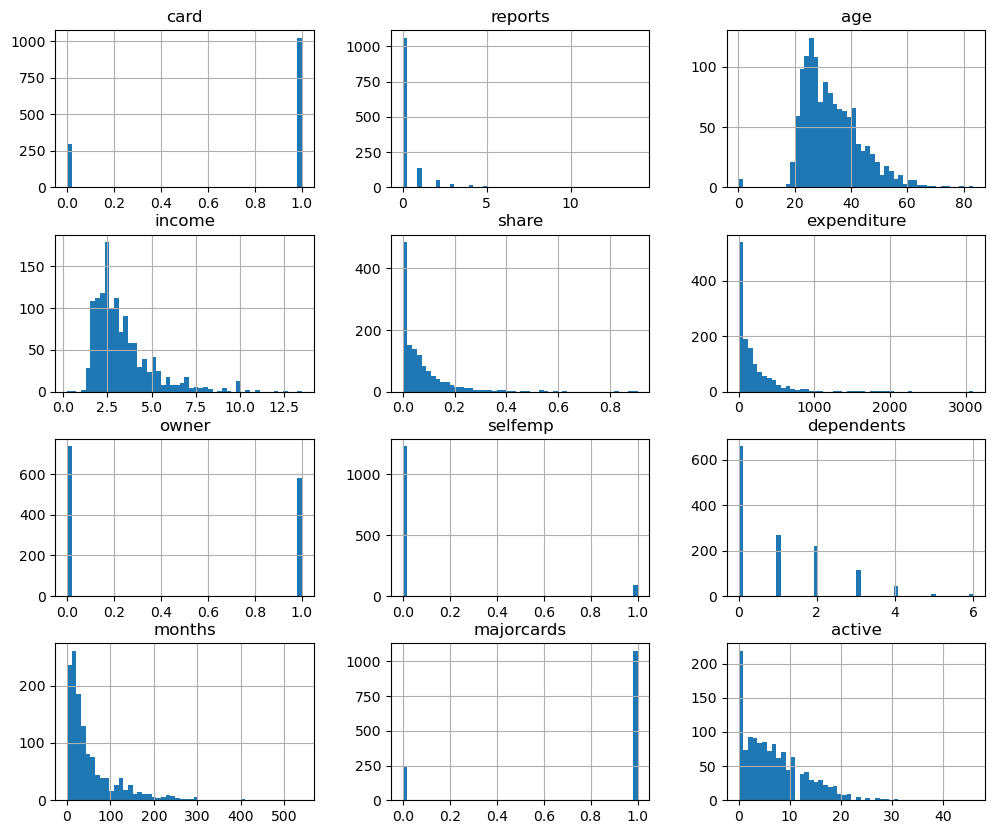

In [15]:
df.hist(bins=50, figsize=(12,10))
plt.show()

# Note: y-axis: feature values: x-axis: number of feature value occurrences
# Note: features distributed on different scales (permits same sized images); though x- and y-axis vary

In [16]:
# display attribute correlations
df.corr(numeric_only=True)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.000537,0.094308,0.388028,0.365814,0.147826,-0.054340,-0.036126,-0.000268,0.107769,0.080464
reports,-0.452577,1.000000,0.044089,0.011023,-0.159011,-0.136538,-0.053570,0.018835,0.019731,0.048968,-0.007304,0.207755
age,0.000537,0.044089,1.000000,0.324653,-0.115697,0.014948,0.367749,0.100421,0.212146,0.436426,0.009777,0.181070
income,0.094308,0.011023,0.324653,1.000000,-0.054429,0.281104,0.324776,0.112294,0.317601,0.130346,0.107138,0.180540
share,0.388028,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.015764,-0.078905,-0.082618,-0.055348,0.051470,-0.023474
expenditure,0.365814,-0.136538,0.014948,0.281104,0.838779,1.000000,0.093180,-0.035638,0.052664,-0.029007,0.077514,0.054724
owner,0.147826,-0.053570,0.367749,0.324776,-0.015764,0.093180,1.000000,0.041673,0.309190,0.238652,0.063851,0.274924
selfemp,-0.054340,0.018835,0.100421,0.112294,-0.078905,-0.035638,0.041673,1.000000,0.042096,0.065912,0.004854,0.029555
dependents,-0.036126,0.019731,0.212146,0.317601,-0.082618,0.052664,0.309190,0.042096,1.000000,0.046512,0.010285,0.107133
months,-0.000268,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.238652,0.065912,0.046512,1.000000,-0.041447,0.100028


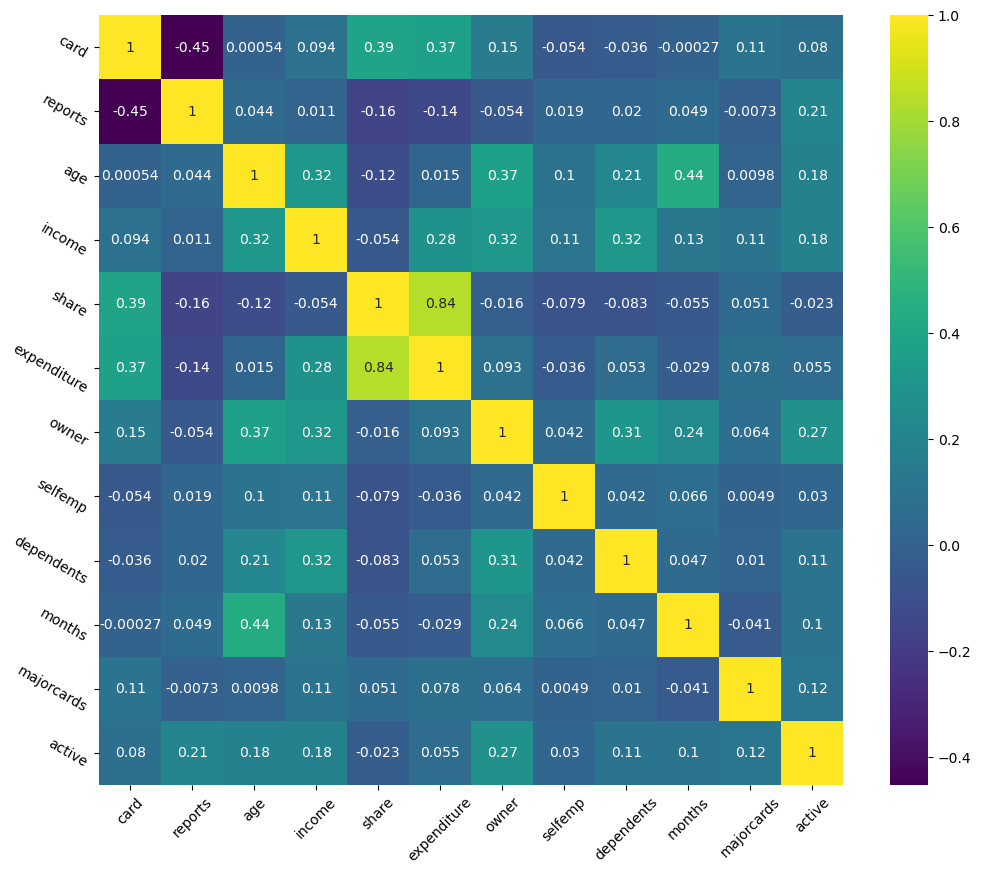

In [17]:
# Visually display correlations using Seaborn's heatmap() function.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(12, 10)) # set figure size (default: 6.4" W X 4.8 " H)
ax = sns.heatmap(df.corr(), cmap="viridis", annot = True)

# rotate x-axis lables 45 degrees
ax.tick_params(axis='x', labelrotation=45)

# rotate y-axis labels -30 degrees
ax.tick_params(axis='y', labelrotation=-30)

plt.show()

# Note: "annot" property set to "True" so that r-values are displayed in each cell.
# Here, display color bar, To turn off: cbar=False (default True).

In [18]:
# Note: Target: "card" (i.e., credit card application accepted)
# 'card' (0,1): nominal categorical variable (categorical: grouped into categories; nominal: no order or ranking)

# display correlation of features against "card"
# Note: no high correlations of *individual* features with "card"

corr = df.corr()
corr['card'].sort_values(ascending=True)

reports       -0.452577
selfemp       -0.054340
dependents    -0.036126
months        -0.000268
age            0.000537
active         0.080464
income         0.094308
majorcards     0.107769
owner          0.147826
expenditure    0.365814
share          0.388028
card           1.000000
Name: card, dtype: float64

In [19]:
# target variable (credit card application accepted)
y=df['card']

In [20]:
# extract features (card predictors)
X = df.drop(['card'], axis=1)

In [21]:
type(y) # display target type

pandas.core.series.Series

In [22]:
type(X) # display feats type

pandas.core.frame.DataFrame

In [23]:
# display target values 
y

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [24]:
# display feature (i.e., predictors) values
X

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [25]:
# value_counts(): returns Series containing frequency of each distinct row in DataFrame
# Note: index represents unique values, and values repersent corresponding counts
# results sorted in desc order of requency (default), and NaN (missing) values excluded

# display frequency distribution of values in variables, and vaiable types
for col in X:
    print(df[col].value_counts())

reports
0     1060
1      137
2       50
3       24
4       17
5       11
7        6
6        5
11       4
9        2
12       1
14       1
10       1
Name: count, dtype: int64
age
28.16667    13
25.16667    11
23.83333    11
25.41667    10
25.25000    10
            ..
44.00000     1
43.16667     1
61.58333     1
35.41667     1
58.08333     1
Name: count, Length: 418, dtype: int64
income
3.0000    61
2.5000    46
2.0000    44
3.5000    41
4.0000    32
          ..
7.2900     1
2.7200     1
3.6240     1
3.6208     1
2.1360     1
Name: count, Length: 431, dtype: int64
share
0.000480    12
0.000400    11
0.000667    11
0.000600    11
0.000462    10
            ..
0.242156     1
0.063762     1
0.021942     1
0.050232     1
0.025058     1
Name: count, Length: 1162, dtype: int64
expenditure
0.000000      317
4.583333        9
8.333333        8
7.083333        5
3.750000        2
             ... 
424.629200      1
7.333333        1
101.298300      1
26.996670       1
777.821700      1
Name:

In [26]:
# split data into training and testing (validation) sets
# Note: random_state is pseudo-random number parameter to reproduce same train test split each time code runs
# Note: specific integer value doesn't matter; what matters is that same integer value is used to achieve reproducible results
# Note: Only test_size OR train_size need to be included, both NOT required. If neither, default 75% training/25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Trivia: If random_state value doesn't matter, why always 42?!

# Answer(s):
# https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b
# https://en.wikipedia.org/wiki/42_(number)

In [27]:
# display X_train, X_test, y_train, y_test shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1055, 11), (264, 11), (1055,), (264,))

In [28]:
# create (instantiate) Random Forest Classifier
# Note: For testing purposes, initially use 10 decision-trees to build model.
# Then, test with 100 decision-trees.
# Does accuracy increase or decrease with number of decision-trees in model?
model = RandomForestClassifier(n_estimators=10, random_state=42) # set hyperparameters

# train model
model.fit(X_train, y_train)

# display feature scores (highest to lowest)
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

share          0.594484
expenditure    0.242217
reports        0.065997
age            0.023173
months         0.022172
income         0.019440
active         0.011970
owner          0.007180
majorcards     0.006652
dependents     0.005018
selfemp        0.001697
dtype: float64

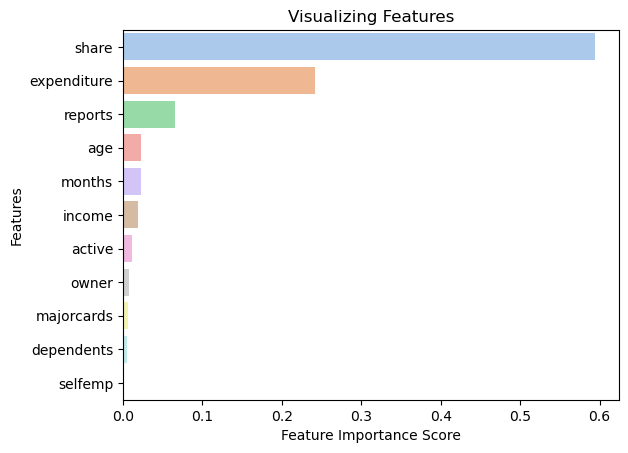

In [29]:
# visualize feature scores
# Create seaborn bar plot (https://seaborn.pydata.org/generated/seaborn.barplot.html)
sns.barplot(x=feature_scores, y=feature_scores.index, hue=feature_scores.index, palette="pastel")

# add lables
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# add title
plt.title("Visualizing Features")

# display graph
plt.show()

In [30]:
# predictions on test set
y_pred = model.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score with 100 decision-trees: {0:0.2f}'. format(accuracy))

# Or, using f-string format
# print(f"Accuracy: {accuracy:.2f}")

# Note: In classification analysis, dependent attribute is categorical.
# Common classification example: determine if email is spam (i.e., "yes"/"no" or 1/0)

# Some Random Forest Use Cases:
# Detects reliable debtors and potential fraudsters in finance
# Verifies medicine components in patient data in healthcare
# Gauges wheter customers will like products in e-commerce

# BE SURE TO REVIEW THIS...
# https://www.kaggle.com/code/mozammalhaquetonoy/intermediate-machine-learning#Data-Leakage

Model accuracy score with 100 decision-trees: 0.97


In [31]:
# # FULL MODEL WITH ACCURACY ASSESMENT (NO VISUALIZATION)!
# # create (instantiate) Random Forest Classifier
# # Note: For testing purposes, initially use 10 decision-trees to build model.
# # Then, test with 100 decision-trees.
# # Does accuracy increase or decrease with number of decision-trees in model?
# model = RandomForestClassifier(n_estimators=10, random_state=42) # set hyperparameters

# # train model
# model.fit(X_train, y_train)

# # predictinos on test set
# y_pred = model.predict(X_test)

# # evaluate model
# accuracy = accuracy_score(y_test, y_pred)
# print('Model accuracy score with 10 decsion-trees: {0:0.2f}'.format(accuracy))

# # Or, using f-string format
# # print(f"Accuracy: {accuracy:.2f}")

# # Note: In classification analysis, dependent attribute is categorical.
# # Common classification example: determine if email is spam (i.e., "yes" / "no" or 1/0)

# # Some Random Forest Use Cases:
# # Detects reliable debtors and potential fraudsters in finance
# # Verifies medicine components in patient data in healthcare
# # Gauges wheter customers will like products in e-commerce

# # BE SURE TO REVIEW THIS...
# # https://www.kaggle.com/code/mozammalhaquetonoy/intermediate-machine-learning#Data-Leakage